<a href="https://colab.research.google.com/github/AbyssGazer-Oliver/Machine-Learning/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

# TODO 1:  Complete the code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None,delim_whitespace=True,names=names,na_values='?')

In [ ]:
# TODO 2: Display the first six rows of the data frame
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [ ]:
# TODO 3: What is the shape of the data? How many attributes are there? How many samples?
print("num shapes=",df.shape)
print("num attributes=",np.size(df,1))
print("num samples=",np.size(df,0))

num shapes= (506, 14)
num attributes= 14
num samples= 506


In [ ]:
# TODO 4: Create a response vector y with the values in the column PRICE
y=df['PRICE']

In [ ]:
# TODO 5: Use the response vector y to find the mean house price in thousands and the fraction of homes that are above $40k.
print("The mean house price is",format(np.mean(y),'.2f'),"thousands of dollars.")
print("Only",format((np.sum(y>40))/np.size(y)*100,'.1f'),"percent are above $40k.")

The mean house price is 22.53 thousands of dollars.
Only 6.1 percent are above $40k.


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# TODO 6: create a predictor vector x containing the values in the RM column
x=df['RM']

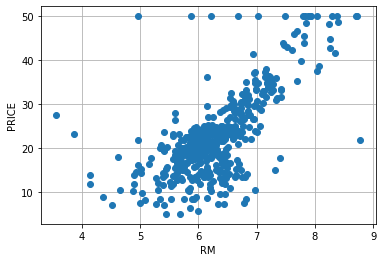

In [ ]:
# TODO 7: Create a scatter plot of the price vs. the RM attribute. Make sure your plot has grid lines and label the axes with reasonable labels
plt.plot(x,y,'o')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.grid(True)

In [ ]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x, 
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    # TODO 8: complete the following code
    xm=np.mean(x)
    ym=np.mean(y)
    syy=np.mean((y-ym)**2)
    syx=np.mean((y-ym)*(x-xm))
    sxx=np.mean((x-xm)**2)
    beta1=syx/sxx
    beta0=ym-beta1*xm
    sst=np.size(y)*syy
    ssr=beta1**2*np.size(x)*sxx
    rsq=ssr/sst
    return beta0, beta1, rsq

In [ ]:
# TODO 9: print the values beta0, beta1 and rsq for the linear model of price vs. number of rooms.
beta0,beta1,rsq=fit_linear(x,y)
print("beta0:",beta0)
print("beta1:",beta1)
print("rsq:",rsq)

beta0: -34.67062077643857
beta1: 9.102108981180303
rsq: 0.4835254559913335


[4 5 6 7 8 9]


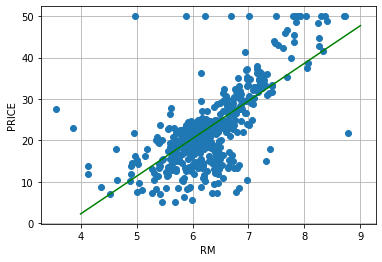

In [ ]:
# TODO 10: Replot the scatter plot above, but now with the regression line.
xp=np.arange(4,10,1)
print(xp)
yp=beta0+beta1*xp+rsq
plt.plot(x,y,'o')
plt.plot(xp,yp,linestyle='solid',color='green')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.grid(True)

In [ ]:
# TODO 11:  compute the 𝑅^2 values for all the predictors and output the values in a table.
rsqs=np.zeros(14)
for i in range(0,14):
  a,b,rsqs[i]=fit_linear(df.iloc[:,i],y)

rsqs=pd.DataFrame(rsqs,index=names,columns=None)
print(np.around(rsqs,3))

             0
CRIM     0.151
ZN       0.130
INDUS    0.234
CHAS     0.031
NOX      0.183
RM       0.484
AGE      0.142
DIS      0.062
RAD      0.146
TAX      0.220
PTRATIO  0.258
B        0.111
LSTAT    0.544
PRICE    1.000
